### Support vector machine classifier fitted by cross validation

 1. Load clean data into memory, normalize all of variables with z-score method
 2. The 4 parameters found through random grid search and then error estimated through cross validation 
     
     - C: Regularization parameter. (l2-regularization)
     - gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
     - kernel: Specifies the kernel type to be used in the algorithm
     
 3. Measure accuracy over test set and AUC

In [1]:
import numpy as np
import pandas as pd
import os

os.chdir('/Users/bwilliams/GoogleDrive/UniversityOfHelsinki/Fall2020/IML/TeamProject/TermProjectIML/bin')
from SplitData import *


from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from sklearn.utils.fixes import loguniform

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

params = {'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-4, 1e-3),
 'kernel': ['linear','sigmoid','rbf']}



svclassifier = SVC(probability=True)

search = RandomizedSearchCV(svclassifier, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_trainval_norm, y_trainval_bin)
svm_params = search.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.1min finished


{'C': 11.091998785656282, 'gamma': 0.0008642674399024057, 'kernel': 'linear'}
Accuracy on Train: 0.9825581395348837
5-Fold CV Accuracy:  0.8982523444160273
Accuracy on Test: 0.8372093023255814


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

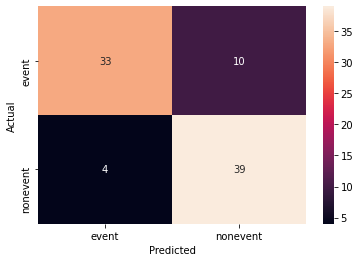

In [2]:

print(search.best_params_)

svm_model = search.best_estimator_

y_pred_train = svm_model.predict(X_trainval_norm)

print("Accuracy on Train:",metrics.accuracy_score(y_trainval_bin, y_pred_train))

y_pred = svm_model.predict(X_test_norm)
# probabilities of class event
y_pred_proba = svm_model.predict_proba(X_test_norm)[:,0]

print('5-Fold CV Accuracy: ', search.best_score_)

print("Accuracy on Test:",metrics.accuracy_score(y_test_bin, y_pred))


import seaborn as sns
confusion_matrix = pd.crosstab(y_test_bin, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


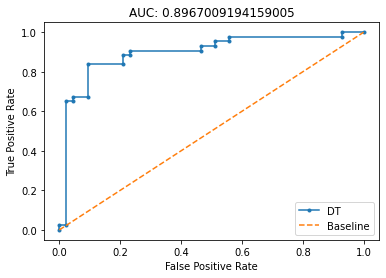

In [3]:
y_test_01 = pd.get_dummies(y_test_bin)['event']

fpr, tpr, thresholds = metrics.roc_curve(y_test_01, y_pred_proba)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr , marker='.', label='DT')
plt.title('AUC: '+ str(auc) )
plt.plot(fpr, fpr, linestyle='--', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Multi class classification

In [4]:
########################################################
# Multiclass

params = {'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-4, 1e-3),
 'kernel': ['linear','sigmoid','rbf']}



svclassifier = SVC(probability=True)

search = RandomizedSearchCV(svclassifier, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_trainval_norm, y_trainval)
svm_params = search.best_params_

print(search.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 109.53031576544694, 'gamma': 0.0005494254346819604, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.2min finished


Accuracy on Train: 0.8313953488372093
5-Fold CV Accuracy:  0.6918158567774937
Accuracy on Test: 0.686046511627907


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

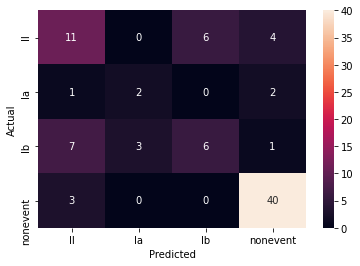

In [5]:
svm_model = search.best_estimator_

y_pred_train = svm_model.predict(X_trainval_norm)

print("Accuracy on Train:",metrics.accuracy_score(y_trainval, y_pred_train))

y_pred = svm_model.predict(X_test_norm)
# probabilities of class event
y_pred_proba = svm_model.predict_proba(X_test_norm)[:,0]

print('5-Fold CV Accuracy: ', search.best_score_)

print("Accuracy on Test:",metrics.accuracy_score(y_test, y_pred))


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

